In [43]:
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [44]:
# Load the dataset, specifying the encoding
file_path = '/content/Sheet_1.csv'
data = pd.read_csv(file_path, encoding='latin-1')
print(data.head())

  response_id        class                                      response_text  \
0  response_1  not_flagged              I try and avoid this sort of conflict   
1  response_2      flagged  Had a friend open up to me about his mental ad...   
2  response_3      flagged  I saved a girl from suicide once. She was goin...   
3  response_4  not_flagged  i cant think of one really...i think i may hav...   
4  response_5  not_flagged  Only really one friend who doesn't fit into th...   

  Unnamed: 3  Unnamed: 4 Unnamed: 5  Unnamed: 6 Unnamed: 7  
0        NaN         NaN        NaN         NaN        NaN  
1        NaN         NaN        NaN         NaN        NaN  
2        NaN         NaN        NaN         NaN        NaN  
3        NaN         NaN        NaN         NaN        NaN  
4                    NaN        NaN         NaN        NaN  


In [45]:
columns_to_drop = ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7']
df = data.drop(columns=columns_to_drop)
df

,response_id,class,response_text
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...
...,...,...,...
75,response_76,not_flagged,"Now that I've been through it, although i'm no..."
76,response_77,flagged,when my best friends mom past away from od'ing...
77,response_78,not_flagged,As a camp counselor I provide stability in kid...
78,response_79,flagged,My now girlfriend used to have serious addicti...


In [46]:
# dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   response_id    80 non-null     object
 1   class          80 non-null     object
 2   response_text  80 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB
None


In [47]:
# missing values
print(df.isnull().sum())

response_id      0
class            0
response_text    0
dtype: int64


In [48]:
df['class'].value_counts()

,count
class,
not_flagged,55
flagged,25


In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['class'])
df

,response_id,class,response_text,Label
0,response_1,not_flagged,I try and avoid this sort of conflict,1
1,response_2,flagged,Had a friend open up to me about his mental ad...,0
2,response_3,flagged,I saved a girl from suicide once. She was goin...,0
3,response_4,not_flagged,i cant think of one really...i think i may hav...,1
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,1
...,...,...,...,...
75,response_76,not_flagged,"Now that I've been through it, although i'm no...",1
76,response_77,flagged,when my best friends mom past away from od'ing...,0
77,response_78,not_flagged,As a camp counselor I provide stability in kid...,1
78,response_79,flagged,My now girlfriend used to have serious addicti...,0


In [50]:
df['Label'].value_counts()

,count
Label,
1,55
0,25


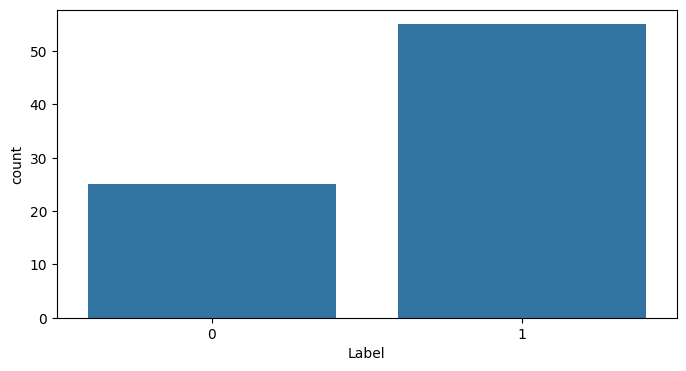

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8, 4))
sns.countplot(x=df['Label'])
plt.show()

In [52]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [53]:
def preprocess_text(text):

    tokens = word_tokenize(text.lower())

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    tagged_tokens = pos_tag(tokens)

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in tagged_tokens]

    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in lemmatized_tokens]

    return ' '.join(stemmed_tokens)
df['processed_text'] = df['response_text'].apply(preprocess_text)
df


,response_id,class,response_text,Label,processed_text
0,response_1,not_flagged,I try and avoid this sort of conflict,1,tri avoid sort conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...,0,friend open mental addict weed take life make ...
2,response_3,flagged,I saved a girl from suicide once. She was goin...,0,save girl suicid . go swallow bunch pill talk ...
3,response_4,not_flagged,i cant think of one really...i think i may hav...,1,cant think one realli ... think may indirectli
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,1,realli one friend n't fit categori . therapist...
...,...,...,...,...,...
75,response_76,not_flagged,"Now that I've been through it, although i'm no...",1,"'ve , although 'm even 'd like , 'm extrem ope..."
76,response_77,flagged,when my best friends mom past away from od'ing...,0,best friend mom past away od' grade 5
77,response_78,not_flagged,As a camp counselor I provide stability in kid...,1,camp counselor provid stabil kid life may trou...
78,response_79,flagged,My now girlfriend used to have serious addicti...,0,girlfriend use seriou addict troubl start date...


In [54]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer object for unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=(1, 2))

X = vectorizer.fit_transform(df['processed_text'])
y = df['Label']

print(X.shape)


(80, 1422)


In [79]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
# Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [81]:
# Predict and evaluate
nb_predictions = nb_classifier.predict(X_test)

In [82]:
# Evaluate
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))

Naive Bayes Accuracy: 0.75
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.86      0.86      0.86        14

    accuracy                           0.75        16
   macro avg       0.43      0.43      0.43        16
weighted avg       0.75      0.75      0.75        16



In [83]:
# Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [84]:
# Predict and evaluate
dt_predictions = dt_classifier.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 0.8125
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.92      0.86      0.89        14

    accuracy                           0.81        16
   macro avg       0.63      0.68      0.64        16
weighted avg       0.85      0.81      0.83        16



In [85]:
# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 0.8125
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.92      0.86      0.89        14

    accuracy                           0.81        16
   macro avg       0.63      0.68      0.64        16
weighted avg       0.85      0.81      0.83        16



In [86]:
# Hp T Naive Bayes
from sklearn.model_selection import GridSearchCV

In [87]:
# the parameter grid for Naive Bayes
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
}

nb_model = MultinomialNB()

In [88]:
# GridSearchCV
grid_search_nb = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_nb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]},
             scoring='accuracy')

In [89]:
print("Best Parameters for Naive Bayes:", grid_search_nb.best_params_)
print("Best Score for Naive Bayes:", grid_search_nb.best_score_)

Best Parameters for Naive Bayes: {'alpha': 5.0}
Best Score for Naive Bayes: 0.7025641025641026


In [90]:
# the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_model = DecisionTreeClassifier()

In [91]:
# GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [92]:
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Score for Decision Tree:", grid_search_dt.best_score_)

Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score for Decision Tree: 0.7820512820512822
